# NTM
author : nakamuraleon  
email : nakamuraleon0552@gmail.com  

### 1. Table of contents

### 2. Dataset

### 3. Reference
https://qiita.com/m3yrin/items/3a8157f65eb9862ac21e

In [1]:
import numpy as np
import os
import pickle
import grid_graph
import gensim
import glob
import trainer

## 2, 3. Loading File (Load dictionary)

In [3]:
def loadfile(period):
    f = open('./Dataset/'+str(period)+'_docsfile.txt', 'rb')
    dicts = pickle.load(f)
    return dicts

def splitdata(dicts):
    test_valid_size = int(len(dicts) * 0.1)
    test_data  = dicts[:test_valid_size]
    valid_data = dicts[test_valid_size : test_valid_size*2]
    train_data = dicts[test_valid_size*2 :]
    return train_data, valid_data, test_data

In [4]:
period = 2000
dicts = loadfile(period)
dicts = dicts[:500]
bow_vocab = gensim.corpora.Dictionary(dicts)
bow_vocab_size = len(bow_vocab)
train_data, valid_data, test_data = splitdata(dicts)

In [5]:
len(train_data)

400

## 5. Training

In [6]:
hidden_dim = 1000 
topic_num = 15
batch_size = 32
ntm_model = trainer.NTMEstimator(input_dim = bow_vocab_size, hidden_dim = hidden_dim, topic_num = topic_num, l1_strength=0.0000001)

/Users/nakamurareon/Library/CloudStorage/OneDrive-Personal/PredNTM/trainer.py:199: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(m.weight)


In [7]:
ntm_model, z_train, z_valid = ntm_model.fit(train_data, valid_data, bow_vocab, batch_size, 10)

/Users/nakamurareon/Library/CloudStorage/OneDrive-Personal/PredNTM/trainer.py:211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.data = np.array(data)
/Users/nakamurareon/Library/CloudStorage/OneDrive-Personal/PredNTM/trainer.py:212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.bow_data = np.array([bow_vocab.doc2bow(s) for s in data])


======== Epoch 1  ========


/Users/nakamurareon/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Overall sparsity = 0.002, l1 strength = 0.00000
Target sparsity = 0.850
Train epoch: 1 Average loss: 2188.0782
Test epoch : 1 Average loss: 2495.7283


KeyboardInterrupt: 

In [ ]:
bow_vocab = gensim.corpora.Dictionary(dicts)
bow_vocab_size = len(bow_vocab)
hidden_dim = 1000
topic_num = 15
batch_size = 32
ntm_model = trainer.NTMEstimator(input_dim = bow_vocab_size, hidden_dim = hidden_dim, topic_num = topic_num, l1_strength=0.0000001)

# Run

In [2]:
def splitdata(dicts):
    test_valid_size = int(len(dicts) * 0.1)
    test_data  = dicts[:test_valid_size]
    valid_data = dicts[test_valid_size : test_valid_size*2]
    train_data = dicts[test_valid_size*2 :]
    return train_data, valid_data, test_data

sitas = []
sita_hats = []
files = glob.glob('./Dataset/*')
for period, file in enumerate(files):
    contents = open(file, 'rb')
    dicts = pickle.load(contents)
    dicts = dicts[:200] # 無くしたい
    if period==0:
        bow_vocab = gensim.corpora.Dictionary(dicts)
        bow_vocab_size = len(bow_vocab)
        hidden_dim = 500
        topic_num = 15
        batch_size = 32
        sita_hat = None
        model = trainer.Estimator(input_dim = bow_vocab_size, hidden_dim = hidden_dim, topic_num = topic_num)
    train_data, valid_data, test_data = splitdata(dicts)
    test_valid_size = int(len(dicts) * 0.1)
    last_batch_idx = len(dicts[test_valid_size*2 :])//batch_size-1
    # ntm_model, pred_sita, train, z_valid = model.fit(train_data, valid_data, bow_vocab, batch_size, period, n_epoch=1)
    # sita_hat = None
    # model, z_train, z_valid = model.fit(train_data, valid_data, bow_vocab, batch_size, last_batch_idx, sita_hat, period, n_epoch=1)
    sita, next_sita_hat = model.fit(train_data, valid_data, bow_vocab, batch_size, last_batch_idx, sita_hat, period, n_epoch=50)
    sitas.append(sita)
    sita_hats.append(next_sita_hat)

/Users/nakamurareon/Library/CloudStorage/OneDrive-Personal/PredNTM/trainer.py:170: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(m.weight)
/Users/nakamurareon/Library/CloudStorage/OneDrive-Personal/PredNTM/trainer.py:179: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.data = np.array(data)
/Users/nakamurareon/Library/CloudStorage/OneDrive-Personal/PredNTM/trainer.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.bow_data = np.array([bow_vocab.doc2bow(s) for s 

======== Epoch 1  ========
sitaNone-batch0
next_sita_hatNone-batch0
sitaNone-batch1
next_sita_hatNone-batch1
sitaNone-batch2
next_sita_hatNone-batch2
sitaNone-batch3
next_sita_hatNone-batch3
sitatensor([[1.1759e-11, 1.0140e-18, 2.0393e-19, 1.0418e-24, 1.2098e-15, 9.9998e-01,
         2.8157e-23, 4.8728e-29, 6.0457e-20, 8.8956e-16, 8.0873e-18, 7.6977e-14,
         1.9210e-05, 5.1432e-17, 2.1127e-12]], grad_fn=<ReshapeAliasBackward0>)-batch4
next_sita_hattensor([[0.0425, 0.0611, 0.0674, 0.0385, 0.0333, 0.0478, 0.0371, 0.1147, 0.1018,
         0.0984, 0.0464, 0.0936, 0.0469, 0.1000, 0.0704]],
       grad_fn=<SoftmaxBackward0>)-batch4
Overall sparsity = 0.002, l1 strength = 0.00000
Target sparsity = 0.850
Train epoch: 1 Average loss: 2101.4947
Test epoch : 1 Average loss: 1719.2348
PP(train) = 20830.188, PP(valid) = 19495.021
======== Epoch 2  ========
sitaNone-batch0
next_sita_hatNone-batch0
sitaNone-batch1
next_sita_hatNone-batch1
sitaNone-batch2
next_sita_hatNone-batch2
sitaNone-batch3


In [8]:
sitas

[tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.1900e-36, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          6.0856e-14, 0.0000e+00, 1.0000e+00]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([[0.0000e+00, 0.0000e+00, 2.5036e-31, 0.0000e+00, 1.8754e-19, 0.0000e+00,
          0.0000e+00, 9.2792e-38, 3.1118e-30, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          3.4930e-19, 0.0000e+00, 1.0000e+00]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[0.0000e+00, 0.0000e+00, 2.8026e-44, 0.0000e+00, 6.5096e-32, 0.0000e+00,
          0.0000e+00, 5.6052e-44, 1.2170e-19, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9062e-34, 0.0000e+00, 1.0000e+00]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[0.0000e+00, 0.0000e+00, 8.6841e-34, 0.0000e+00, 2.9853e-35, 0.0000e+00,
          0.0000e+00, 2.2055e-27, 1.4237e-23, 8.5186e-41, 0.0000e+

In [4]:
sita_hats

[tensor([[0.0817, 0.0444, 0.1043, 0.0502, 0.0601, 0.0669, 0.1075, 0.0923, 0.0593,
          0.0523, 0.0620, 0.0556, 0.0510, 0.0708, 0.0414]],
        grad_fn=<SoftmaxBackward0>),
 tensor([[0.0817, 0.0444, 0.1043, 0.0502, 0.0601, 0.0669, 0.1075, 0.0923, 0.0593,
          0.0523, 0.0620, 0.0556, 0.0510, 0.0708, 0.0414]],
        grad_fn=<SoftmaxBackward0>),
 tensor([[0.0817, 0.0444, 0.1043, 0.0502, 0.0601, 0.0669, 0.1075, 0.0923, 0.0593,
          0.0523, 0.0620, 0.0556, 0.0510, 0.0708, 0.0414]],
        grad_fn=<SoftmaxBackward0>),
 tensor([[0.0817, 0.0444, 0.1043, 0.0502, 0.0601, 0.0669, 0.1075, 0.0923, 0.0593,
          0.0523, 0.0620, 0.0556, 0.0510, 0.0708, 0.0414]],
        grad_fn=<SoftmaxBackward0>),
 tensor([[0.0817, 0.0444, 0.1043, 0.0502, 0.0601, 0.0669, 0.1075, 0.0923, 0.0593,
          0.0523, 0.0620, 0.0556, 0.0510, 0.0708, 0.0414]],
        grad_fn=<SoftmaxBackward0>),
 tensor([[0.0817, 0.0444, 0.1043, 0.0502, 0.0601, 0.0669, 0.1075, 0.0923, 0.0593,
          0.0523, 0.062

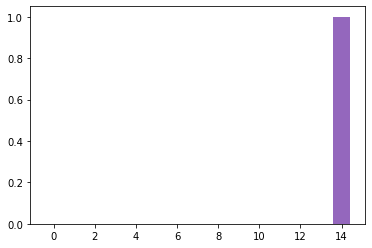

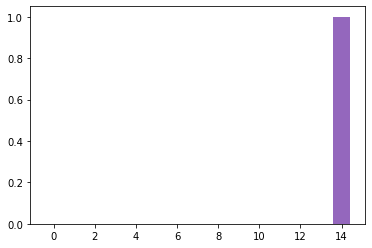

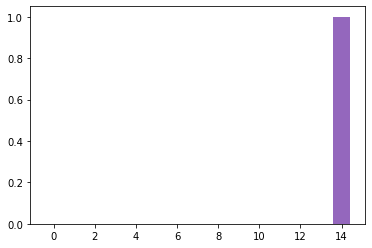

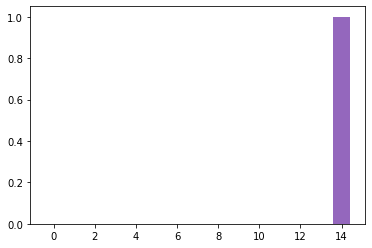

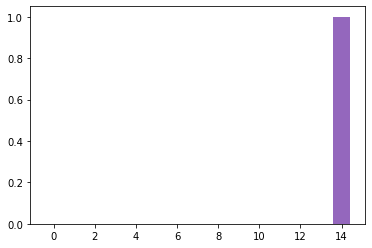

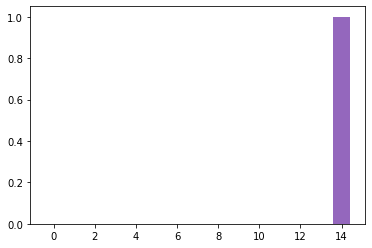

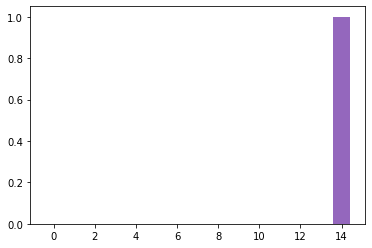

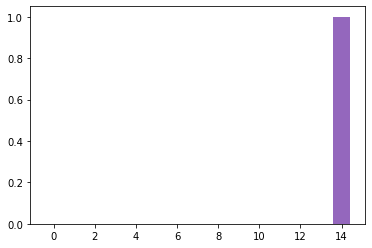

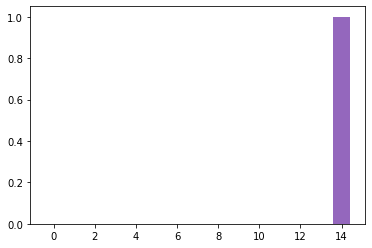

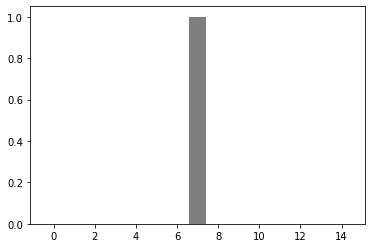

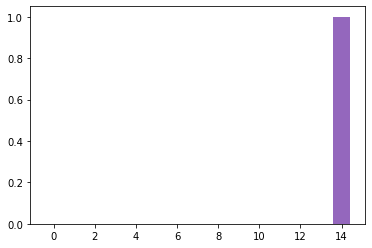

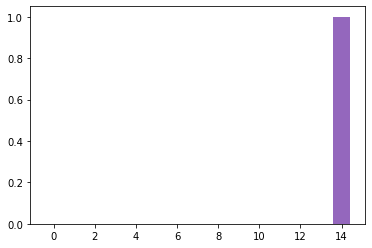

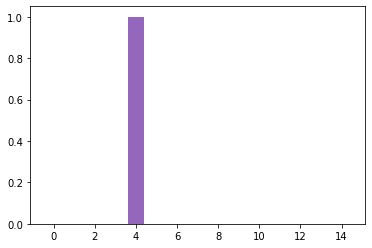

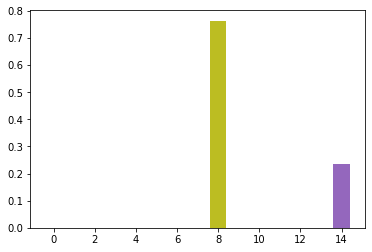

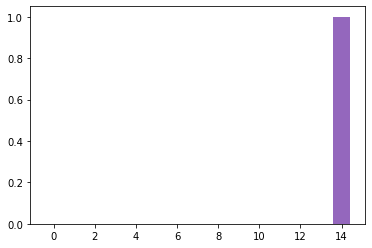

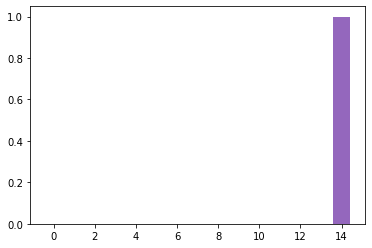

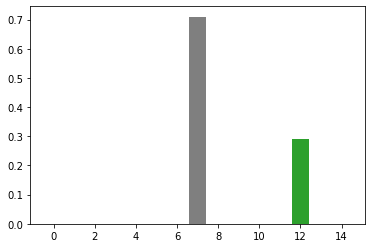

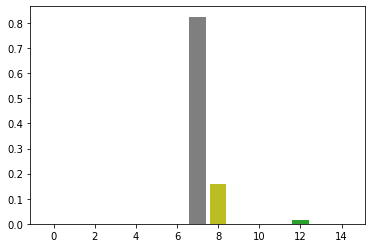

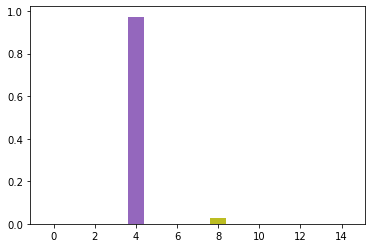

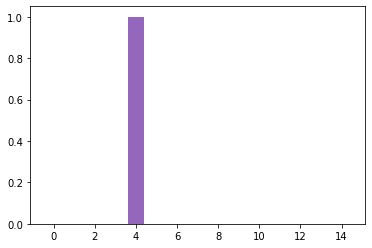

In [33]:
import matplotlib.pyplot as plt
# fig,axes = plt.subplots(nrows=5,ncols=4,figsize=(20,10))
for j in range(20):
    for i, item in enumerate(sitas[j][0]):
        # print(i, item.item())
        plt.bar(i, item.item())

    # axes[i//4, i//5].show()
    plt.show()

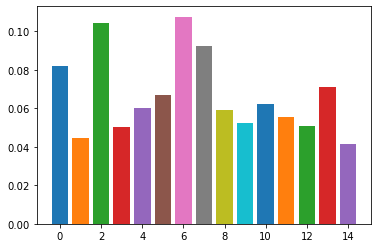

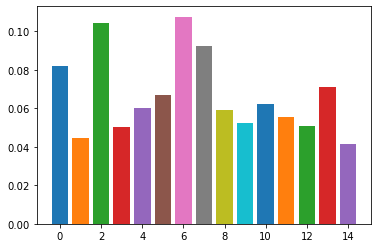

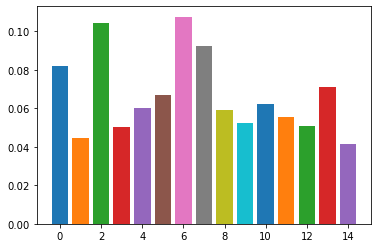

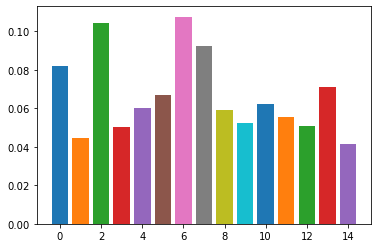

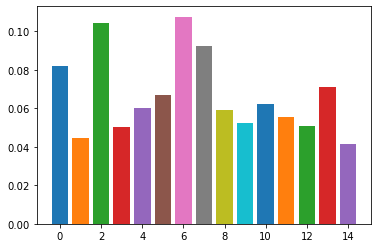

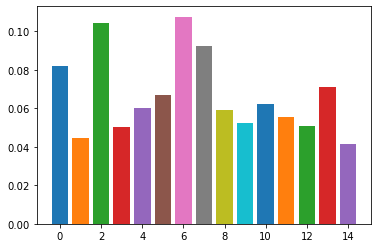

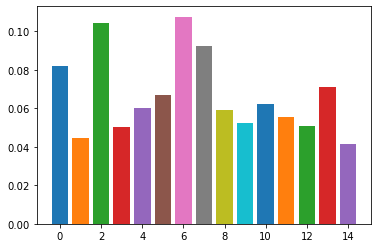

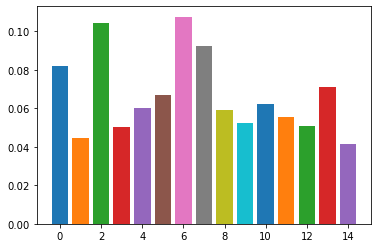

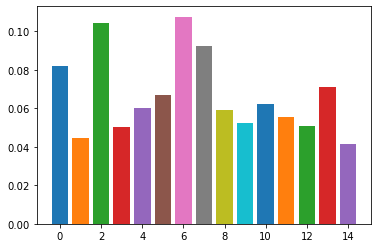

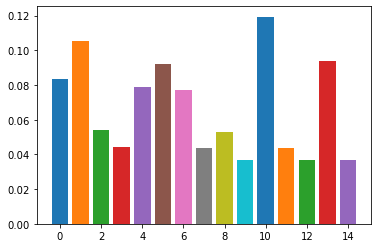

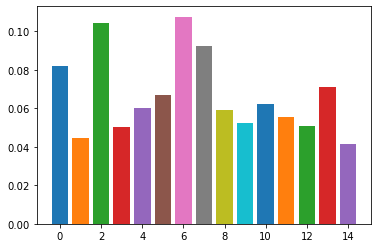

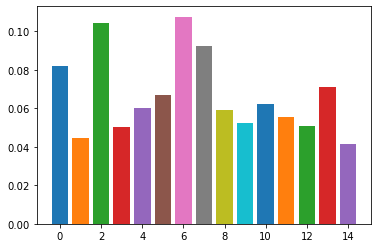

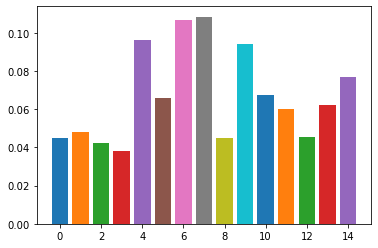

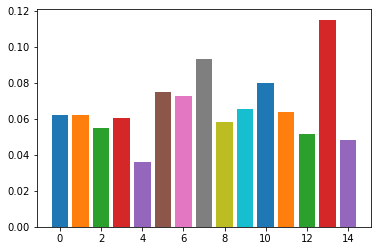

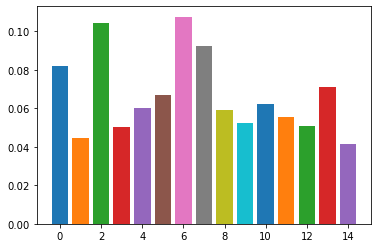

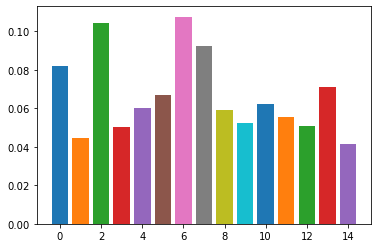

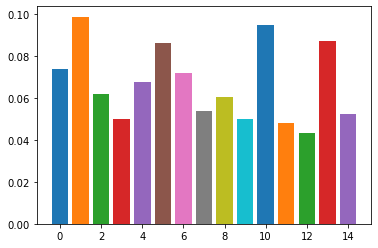

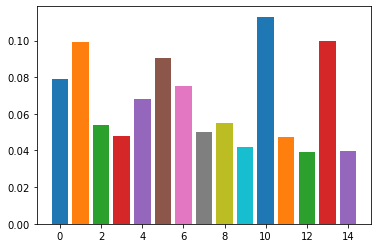

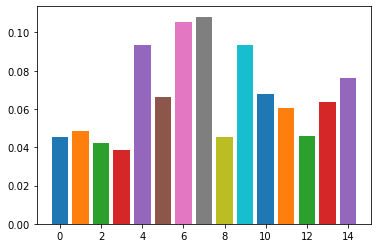

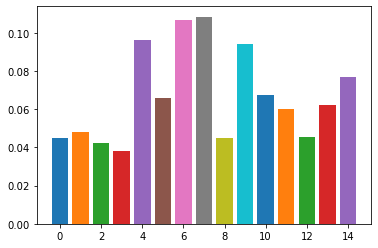

In [18]:
for j in range(20):
    for i, item in enumerate(sita_hats[j][0]):
        # print(i, item.item())
        plt.bar(i, item.item())
        # plt.savefig('' + str(i) + '.png')
    plt.show()

In [34]:
import torch
z = torch.softmax(z_train, dim=1).detach()
z

tensor([[0.1396, 0.0239, 0.0263,  ..., 0.0221, 0.1890, 0.0608],
        [0.0582, 0.0133, 0.0250,  ..., 0.0225, 0.2440, 0.0666],
        [0.0729, 0.0186, 0.0256,  ..., 0.0234, 0.2535, 0.0801],
        ...,
        [0.0858, 0.0352, 0.0254,  ..., 0.0125, 0.2291, 0.0738],
        [0.1421, 0.0133, 0.0249,  ..., 0.0042, 0.3370, 0.0403],
        [0.1147, 0.0223, 0.0327,  ..., 0.0232, 0.1612, 0.0616]])

In [6]:
from torch import nn
import torch
loss = nn.MSELoss()
# input = torch.randn(1, 5, requires_grad=True)
input = torch.tensor([1.0, 2.0, 3.0])
target = torch.tensor([1.0, 2.0, 3.0])
# target = torch.tensor([2, 2, 3])


In [4]:
target

NameError: name 'target' is not defined

In [8]:
import torch
from torch import nn
target = torch.tensor([[1.0, 2.0, 3.0]])
input = torch.tensor([[1.0, 2.0, 3.0]])
loss = nn.MSELoss()
loss(input, target)
# a = torch.cat((target, input), 0)
# torch.softmax(a, dim=1)
# target.add_(input)
# target + input

tensor(0.)

In [12]:
target = torch.randn(1,1000)
nn.MSELoss(target, target)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [36]:
output.item() + 1

1.0

In [64]:
term_z = []
for i in range(topic_num):
    term_z.append(sum(z[:,i]))
term_z = np.array(term_z)
# z = torch.softmax(z, dim=1).detach().cpu().numpy()
# z_a
term_z/sum(term_z)

array([0.10635299, 0.12664911, 0.04766772, 0.02757354, 0.05697789,
       0.05699783, 0.03527545, 0.11439677, 0.07075627, 0.04713076,
       0.05768883, 0.12192362, 0.02987717, 0.03248456, 0.06824748])

In [55]:
from sklearn.preprocessing import MinMaxScaler

#正規化のクラスを準備
ms = MinMaxScaler()
 
#特徴量の最大値と最小値を計算し変換
ms.fit_transform(term_z.T).T[0]/sum(ms.fit_transform(term_z.T).T[0])

array([0.11836473, 0.13411619, 0.0479399 , 0.        , 0.06292735,
       0.06392176, 0.02147614, 0.12511938, 0.0829907 , 0.04677167,
       0.06448372, 0.13043394, 0.00752335, 0.01465324, 0.07927793])

c:\Users\err09\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\err09\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
p

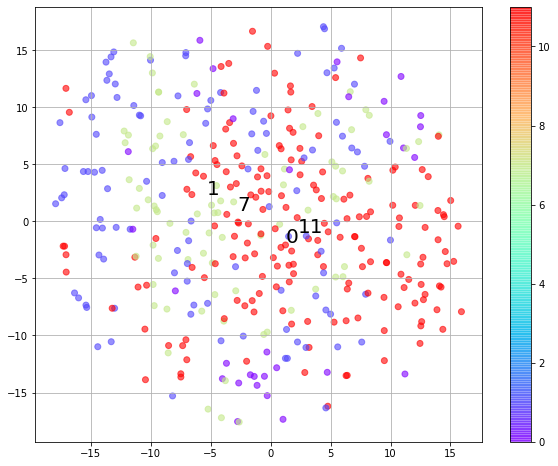

In [6]:
grid_graph.grid_graph(z_train, topic_num)

## 6. Performance Evaluation

In [19]:
dataloader_test  = trainer.DataLoader(test_data, bow_vocab, batch_size, shuffle=False)
pp_test = trainer.compute_perplexity(ntm_model, dataloader_test)
print("PP(test) = %.3f" % (pp_test))

c:\Users\err09\OneDrive\Project\Study\01_topicmodel\FLmodel_NTM\trainer.py:158: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(data)
c:\Users\err09\OneDrive\Project\Study\01_topicmodel\FLmodel_NTM\trainer.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.bow_data = np.array([bow_vocab.doc2bow(s) for s in data])
c:\Users\err09\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


PP(test) = 16427.260


In [20]:
logdir = "./"
ntm_model.print_topic_words(bow_vocab, os.path.join(logdir, 'topwords_e%d.txt' % 9999))

Writing to ./topwords_e9999.txt
Topic 0: テーブル ワイヤ スパン 駆動装置 シリンダ 走行レール 検出精度 ウインチ 位置情報 右
Topic 1: 型枠 設 配筋 鉄筋 コンクリート 施工 工期 現場 Ｃ 径
Topic 2: 他端 移動 一端 先端 型枠 後方 コンクリート 両端 セメント 隔壁
Topic 3: 建物 スパン 一般 電波 コスト 平面図 付加機能 上記課題 上記実施 履歴
Topic 4: 内面 － 特開平 下部 複数 材 両端 ～図 隔壁 型枠
Topic 5: 上記 説明 図面 形態 技術分野 図 実施形態 課題 効果 符号
Topic 6: 上部 ｄ 実施形態 ｃ 作業 側面図 ｂ 号公報 両側 上面
Topic 7: 地震 架構 降伏点鋼 剛性 モーメント 溶接等 鋼材 鉛直荷重 柱 記載
Topic 8: 同上 水底 一定間隔 ドライ空間 斜路 水上 目成形ケーソン ケーソン側壁 降下状態 ケーソン成形型枠装置
Topic 9: － 特開平 号公報 トンネル 記載 後方 外側 地山 掘削 左右
Topic 10: 斜視図 内面 図示 径 後方 ｄ 中央 左右方向 円筒状 前方
Topic 11: 地震 部分 変位 ダンパー 下部 水平力 上面 揺れ 架構 構造
Topic 12: 両端 断面図 周面 参照 他方 端部 ｃ ｂ 増強 端面
Topic 13: 部材 力 形状 方向 一端 移動 間隔 斜視図 上下 内側
Topic 14: 効率 程度 方向 装置 前記 範囲 面 作業 問題点 他
[[ 7.1993372e-06 -1.6985834e-06  1.4108712e-06 ... -2.9334951e-05
  -4.0255563e-05 -2.6012287e-05]
 [ 8.6775499e-06  9.9357158e-07 -7.0794440e-06 ...  1.0917112e-05
  -6.3899970e-06  3.1294971e-05]
 [ 1.8935904e-06 -9.3974234e-07 -4.7839849e-06 ... -2.4753861e-05
  -2.1822005e-05 -3.7616854e-05]
 ...
 [ 1

## 7. Predict

In [21]:
trainer.lasy_predict(ntm_model, dataloader_test, bow_vocab, num_example=50, n_top_words=10)


===== # 1, Topic : 13, p : 14.7881 %
Topic words : 部材, 力, 形状, 方向, 一端, 移動, 間隔, 斜視図, 上下, 内側
Input : 破壊 孔 破壊電極 進行方向 衝撃波 内部 図 破壊対象 挿入物 電解液 内部形状 プラズマ破壊方法 プラズマ破壊装置 上記発明 発明 形状 反射衝撃波 すり鉢状 回転楕円体 軸方向 上記孔 断面図 上記衝撃波 実施 パルスパワー源 上記内部形状 対数螺旋形状 形態 側方 上記進行方向制御手段 孔加工手段 孔内部 構成 所望 破壊力 焦点 挿入物配置手段 先端 コンデンサバンク 同軸ケーブル エネルギー 方向 楕円体 境目 液 効率 破壊方法 ～（ｃ 電極 反射 岩石 手段 法線方向 側面 すり鉢形状 平面衝撃波 壁面 部分 ラプチャーディスク すり鉢状部分 ａ すり鉢 上記挿入物 破壊対象自体 孔底面 進行方向制御手段 上記破壊対象自体 底部 容器状 上記電解液 上記境目 上記回転楕円体 接地電極 箇所 向き 奥 層状 圧力 技術 角度 導電体 絶縁体 制御 加工 中央部 回転楕円形 特定方向 略回転楕円体 導線部分 外周部 構造 日本規格協会 説明 スイッチ 電荷 破損 他方 凸 音速 底 配置 方位 範囲 先端付近 電解液層状注入手段 装置 動作原理 図示省略 遮蔽層 放電 放電エネルギー 寿命化 円錐状 原理 干渉縞 高山和喜 破裂弁 特許請求 孔あけ 先端形状 円錐形状 上記目的 上記ラプチャーディスク 上記実施 回路 電源 ｂ ロス 上述 曲面 転換 屈折 特性 所望形状 円柱形状 特定 一定 対数螺旋流路 ｃ 筐体 中央部分 遷移図 概念図 断面構造 中心部分 周囲 ドリル 水 課題 出口 斜め 中空部分 既知 参照 フォーカス 内側 渦 文献 はなし ｐ ～ 意味 一方向 矢印 近傍 圧力増幅率 干渉 自体 円錐 衝撃圧力 問題点 発生点 技術分野 特開平 号公報 形 衝撃 周辺機器 目的 一定角度 － 概要 車体 片側 極 電位差 内面 固体 穴 例 上方 挙動 順 下方 曲線 下端 一般 集中 抑制 任意 意義 母線 種類 比重 差 角 rupture disc 内壁 空間 媒体 例示 均等 変更 効果 図面 様子 符号

===== # 2, Top